In [11]:
from ts_limit.structured_field.b_field import structured_field
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.nel.icm import NelICM
from ts_limit.grid import Grid
# from ts_limit.grid_survival_prob.probs import Probs
import numpy as np
import sys
from math import ceil
# import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


3.9269908169872414


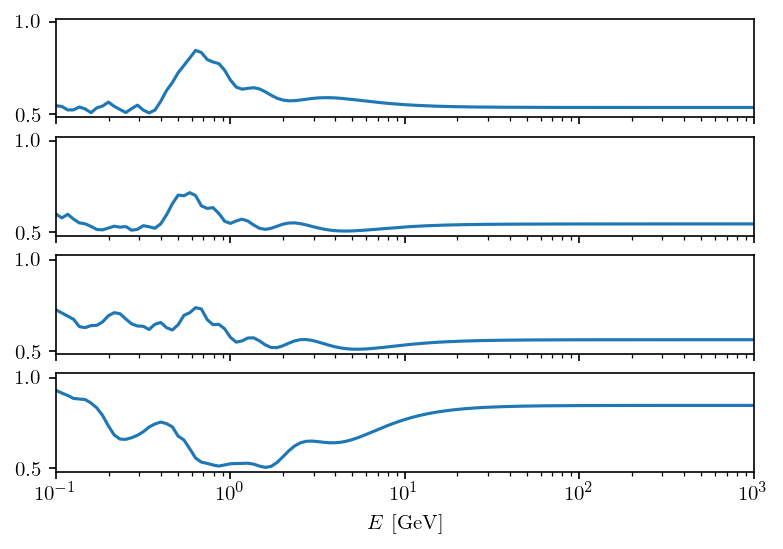

In [53]:
#start = int(sys.argv[1])
fig, axs = plt.subplots(4, 1, dpi=150)

b = structured_field(8.3, 93, 225)
r = b.r
n_el = NelICM(n0=39., n2=4.05, r_abell=500., r_core=80., r_core2=280., beta=1.2, beta2=0.58, eta=1.)
n_el_vec = n_el.__call__(r)
# print(r)
# print(n_el_vec)

log10MeV = np.loadtxt('energy_bins.dat')
EMeV = np.power(10, log10MeV)
EGeV = np.power(10, log10MeV - 3.)
grid = Grid()
# print(log10MeV)
ppb = 10
for c, g in enumerate([100, 60, 30, 10]):
    #gm = grid.get_gm(i)
    #g = i
    m = 2
    alp = ALP(m,g)
    source = Source(z = 0.017559, ra = '03h19m48.1s', dec = '+41d30m42s')
    pin = 0.5 * np.diag((1., 1., 0.))
    length = log10MeV.shape[0]
    parts = ceil(length / 20)
    psurv_ = np.zeros((1, length))
    for part in range(parts):
        log10GeV = log10MeV[part*20:(part+1)*20]
        nbins = log10GeV.shape[0]
        delta_e = log10GeV[1] - log10GeV[0]
        delta_p = delta_e / ppb
        log_e_space = np.linspace(log10GeV[0], log10GeV[-1] + delta_e, num=nbins * ppb, endpoint=False) - (ppb - 1) / 2 * delta_p
        EGeV = np.power(10, log_e_space - 3.)


        
        ml = ModuleList(alp, source, pin=pin, EGeV=EGeV)
        ml.add_propagation("Array", 0, Btrans=b.b_trans, psi=b.angle, nel=n_el_vec, dL=b.dL_vec)
        #ml.add_propagation("EBL",1, model='dominguez')
        ml.add_propagation("GMF",2, model='pshirkov', model_sym='BSS')
        px, py, pa = ml.run()
        psurv = px + py
        psurv = psurv.reshape((1, nbins, ppb))
        psurv_[0, part*20:(part+1)*20] = np.average(psurv, axis=-1)
    axs[c].plot(np.power(10, log10MeV -3), psurv_[0])
    axs[c].set_xlim((1e-1, 1e3))
    axs[c].set_xscale('log')
    if c != 3:
        axs[c].set_xticklabels([])
    axs[c].set_xlabel('$E$ [GeV]')
    #np.savetxt(f'/nfs/astrop/n1/kuhlmann/NGC_1275/ts_limit/grid_survival_prob/structured/gm_{i}_theta_{b._theta_}_B0_{b.B_0:1.1f}.dat', psurv_)

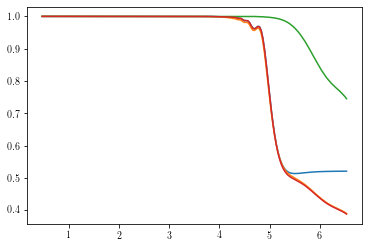

In [28]:
plt.plot(log10MeV, psurv_[0])
plt.plot(log10MeV, psurv_ebl[0])
plt.plot(log10MeV, ml_atten)
plt.plot(log10MeV, ml_atten * psurv_[0])

In [10]:
pa

array([[0.47893496, 0.47893118, 0.47892751, 0.47892383, 0.47892013,
        0.47891657, 0.47891299, 0.47890947, 0.4789059 , 0.47890246,
        0.47889897, 0.47889553, 0.47889213, 0.47888877, 0.4788854 ,
        0.47888207, 0.47887875, 0.47887542, 0.47887216, 0.4788689 ,
        0.47886568, 0.47886247, 0.47885926, 0.47885607, 0.47885292,
        0.47884982, 0.47884666, 0.47884355, 0.47884046, 0.47883738]])

In [23]:
ml._atten

array([0.76107223, 0.76056729, 0.7599116 , 0.75909846, 0.75817116,
       0.7573413 , 0.75663713, 0.75604283, 0.75547969, 0.75493672,
       0.75442339, 0.75398922, 0.75364117, 0.7533525 , 0.75298096,
       0.75250565, 0.75191766, 0.75116722, 0.75024723, 0.74919935,
       0.74825478, 0.74744914, 0.74676686, 0.74612018, 0.74549499,
       0.74490031, 0.74439016, 0.74397326, 0.74362423, 0.74318867])